## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Pre Profiling](#section302)<br/>
    - 3.3 [Preprocessing](#section303)<br/>
    - 3.4 [Post Profiling](#section304)<br/>
4. [Questions](#section4) 
    - 4.1 [Highest gross income, highest rating, highest votes]
    - 4.2 [Analyzing movies who earned > 500 mln revenues](#section403)<br/>
    - 4.3 [Overall performance of the movies based on Ratings]   
    - 4.4 [Analysis on Movies released year wise]
    - 4.5 [Relations between Ratings and Revenues](#section402)<br/>
    - 4.6 [Analyzing relationship between rating and Metascore]    
    - 4.7 [Released movies and rating count](#section404)<br/>
    - 4.8 [Movies released between 2005-2010, 2010-2015, 2016+](#section401)<br/>
5. [Conclusions](#section5)<br/>  

# 1. __Problem statement__

Understand the movies data by EDA and derive simple models with Pandas as baseline.

### 2. __Data Loading and Description__
- The dataset consists of the information about movies releases since 2006 till 2016.
- The dataset comprises of 1000 observations of 12 columns. Below is a table showing names of all the columns and their description.
Rank	
Title	
Genre	
Description	
Director	
Actors	
Year	
Runtime (Minutes)	
Rating	
Votes	
Revenue (Millions)	
Metascore


# 2. Importing packages and Dataset

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib as mat
import bokeh
import pandas_profiling
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv("D:\\Personal\\Study\\Insaid\\project\\1000 movies data.csv")
# Preview the first 5 lines of the loaded data 
data.head(3)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0


## 3. Data Profiling
- In the upcoming sections we will first __understand our dataset__ using various pandas functionalities.
- Then with the help of __pandas profiling__ we will find which columns of our dataset need preprocessing.
- In __preprocessing__ we will deal with erronous and missing values of columns. 
- Again we will do __pandas profiling__ to see how preprocessing have transformed our dataset.
### 3.1 Understanding the Dataset

In [4]:
#data.shape()
#data.columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank                  1000 non-null int64
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.8+ KB


__Movies data set has 1000 rows, 12 columns, 128 missing values for Revenues and 64 missing Metascore values__

In [5]:
movies_df=data.set_index('Title')
movies_df.head(2)

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0


In [6]:
movies_df['Year'].min()

2006

In [7]:
movies_df['Year'].max()

2016

# 3.2 Preprofilling

In [8]:
profile = pandas_profiling.ProfileReport(movies_df)
profile.to_file(outputfile="Movies_before_preprocessing.html")

# 3.3 Preprocessing

In [9]:
median_Metascore = movies_df['Metascore'].mean()
movies_df['Metascore'].fillna(median_Metascore,inplace=True)
median_Revenues = movies_df['Revenue (Millions)'].mean()
movies_df['Revenue (Millions)'].fillna(median_Revenues,inplace=True)
movies_df['Revenue (Millions)'].isnull().sum()

0

# 4. Questions

# 4.2 Highest  gross income, highest rating, highest votes

In [10]:
movies_df['Revenue (Millions)'].max()

936.63

In [11]:
movies_df[movies_df['Revenue (Millions)'] >= 936.63]

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Star Wars: Episode VII - The Force Awakens,51,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0


__Star Wars: Episode VII - The Force Awakens is having highest earning movie released between years 2006-2016__

In [12]:
#movies_df['Rating'].max()
movies_df['Votes'].max()

movies_df[movies_df['Votes'] == 1791916]

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0


In [13]:
movies_df[movies_df['Rating'] == 9]

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0


__The Dark Knight is having highest rating for movies released between years 2006-2016__

# 4.3 Movies who earned more than 500 Mln

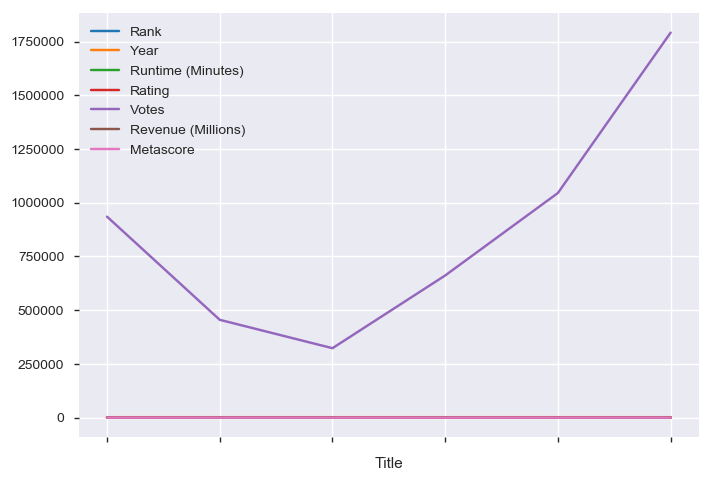

In [14]:
#movies_df[movies_df['Revenue (Millions)'] >= 500]
#movies_df[movies_df['Revenue (Millions)'] >= 500].iloc[:,:]
movies_df[movies_df['Revenue (Millions)'] >= 500].iloc[:,:].sort_index().plot.line()

__6 movies has made in list of having gross earning > 500 mln__

# 4.4 Overall performance of the movies based on Ratings

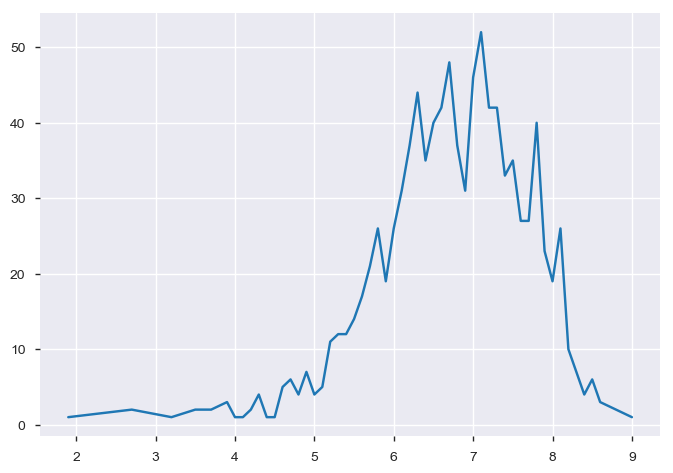

In [15]:
movies_df['Rating'].value_counts().sort_index().plot.line()

__As can be seen from graph, most of the movies has got rating > 5.5. This means people have liked most of the movies.__

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


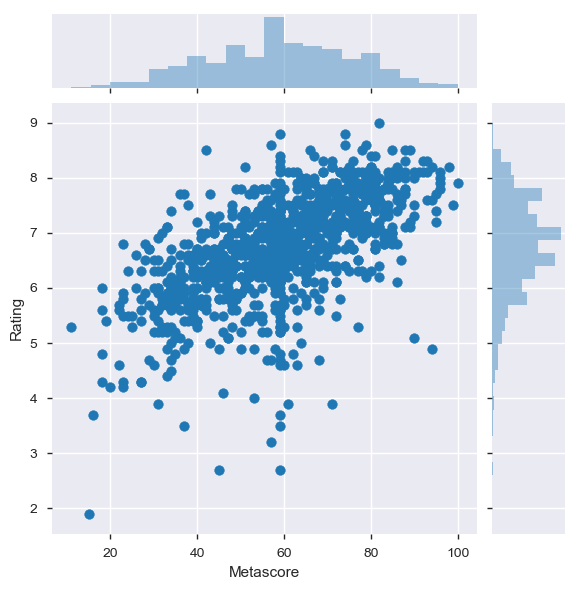

In [16]:
j1 = sns.jointplot(data=movies_df, x='Metascore', y='Rating')

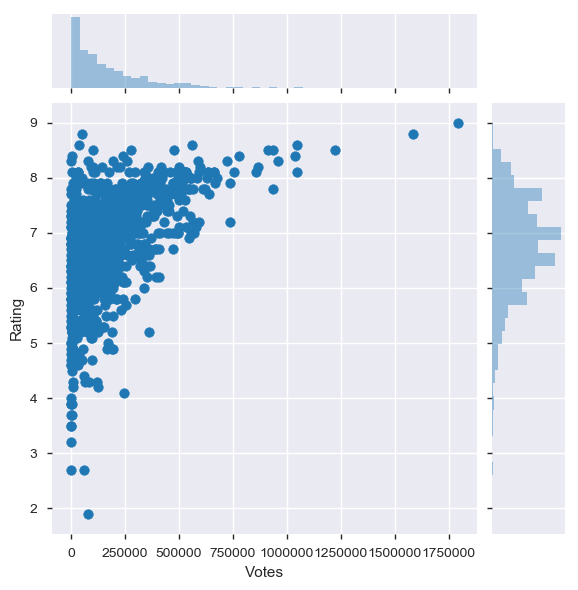

In [17]:
j1 = sns.jointplot(data=movies_df, x='Votes', y='Rating')

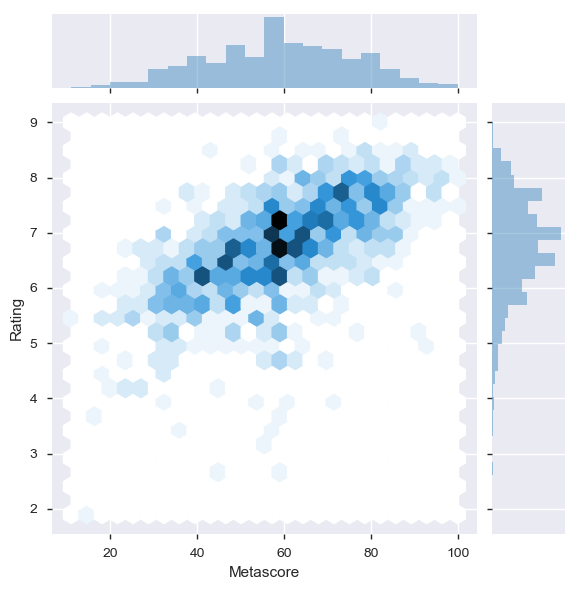

In [18]:
j1 = sns.jointplot(data=movies_df, x='Metascore', y='Rating',kind='hex')

# 4.5 Analysis on Movies released year wise

In [19]:
movies_yearwise=movies_df.groupby('Year')
movies_yearwise.count()

,Rank,Genre,Description,Director,Actors,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Year,,,,,,,,,,
2006,44,44,44,44,44,44,44,44,44,44
2007,53,53,53,53,53,53,53,53,53,53
2008,52,52,52,52,52,52,52,52,52,52
2009,51,51,51,51,51,51,51,51,51,51
2010,60,60,60,60,60,60,60,60,60,60
2011,63,63,63,63,63,63,63,63,63,63
2012,64,64,64,64,64,64,64,64,64,64
2013,91,91,91,91,91,91,91,91,91,91
2014,98,98,98,98,98,98,98,98,98,98


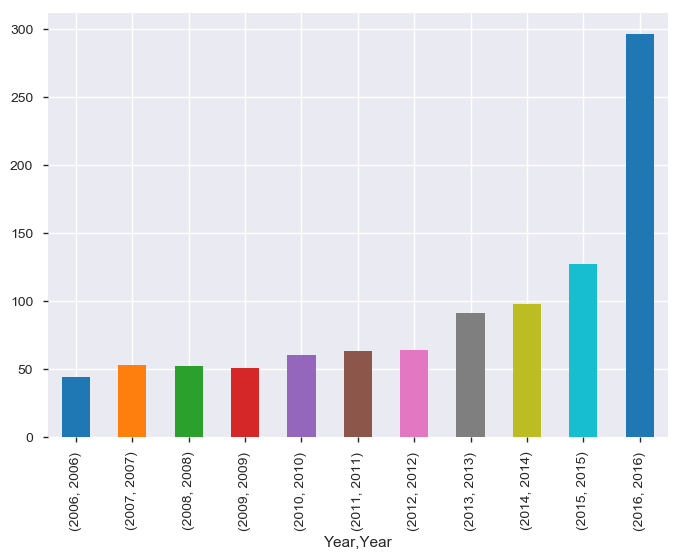

In [20]:
movies_yearwise['Year'].value_counts().plot.bar()

__More number of movies are getting releases every year compared to previous year. Alone 2016 holds 30% of the movies releases in last 10 years.__

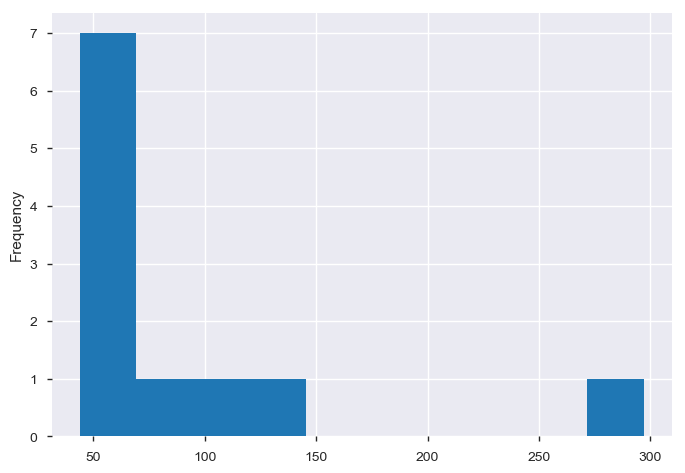

In [21]:
movies_yearwise['Year'].value_counts().plot.hist()

__It has happened 7 times that only 50 movies are releases in a year, while only once 100, 150 and 300 movies are released.__

# 4.6 Relations between Ratings and Revenues

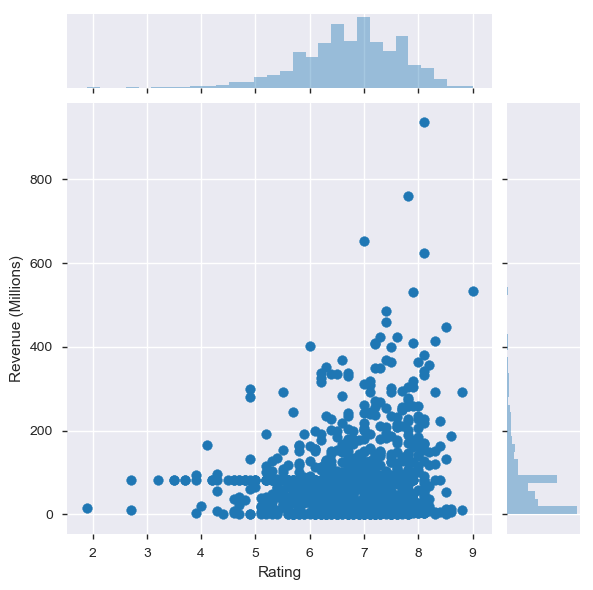

In [22]:
sns.jointplot(data=movies_df, y='Revenue (Millions)', x='Rating')

__There are many films which has good Rating but they have earned revenues around < 200 mln. Movies who have rating =8 have earned more revenues than movies having rating 9__

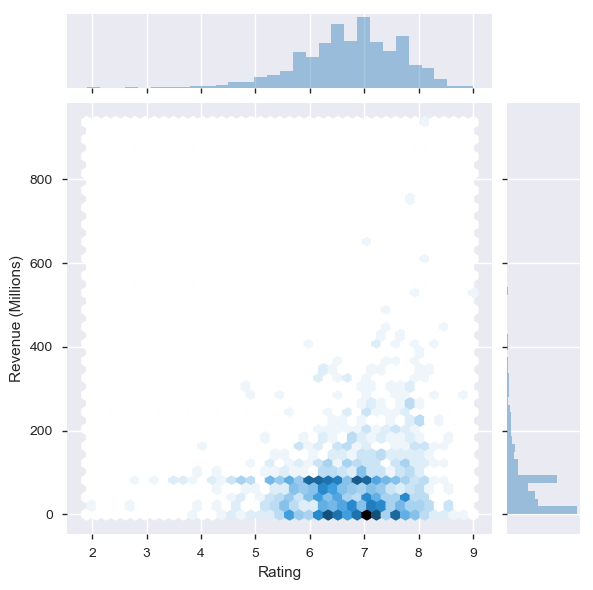

In [23]:
sns.jointplot(data=movies_df, y='Revenue (Millions)', x='Rating',kind='hex')

# 4.7 Relationship between Rating and Metascore

In [24]:
movies_df.groupby(['Year', 'Genre_1'])
#movies_df['Genre_1'].value_counts()
vis1 = sns.lmplot(data=movies_df, x='Rating', y='Metascore', \
                 fit_reg=False, hue='Genre_1', size=6, aspect=1)

KeyError: 'Genre_1'

# 4.8 Movies Duration wise

In [ ]:
movies_df.loc[:, 'Runtime (Minutes)'].plot(kind = 'hist', bins=40);

In [ ]:
movies_df.loc[:, 'Runtime (Minutes)'].plot(kind = 'box', );

In [ ]:
movies_RunTime_120 = movies_df[(movies_df['Runtime (Minutes)']>120) & (movies_df['Rating']>5)]
movies_RunTime_120.boxplot(column='Runtime (Minutes)', by='Rating', figsize=(10,5));

# 4.9 Movies released year wise/ genre wise

In [30]:
movies_df['Genre_1'] = movies_df['Genre'].str.split(',',expand=True)[0]
movies_df.sample(2)

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Genre_1
Title,,,,,,,,,,,,
The Light Between Oceans,191,"Drama,Romance",A lighthouse keeper and his wife living off th...,Derek Cianfrance,"Michael Fassbender, Alicia Vikander, Rachel We...",2016,133,7.2,27382,12.53,60.0,Drama
Paul,732,"Adventure,Comedy,Sci-Fi",Two British comic-book geeks traveling across ...,Greg Mottola,"Simon Pegg, Nick Frost, Seth Rogen, Mia Stallard",2011,104,7.0,201707,37.37,57.0,Adventure


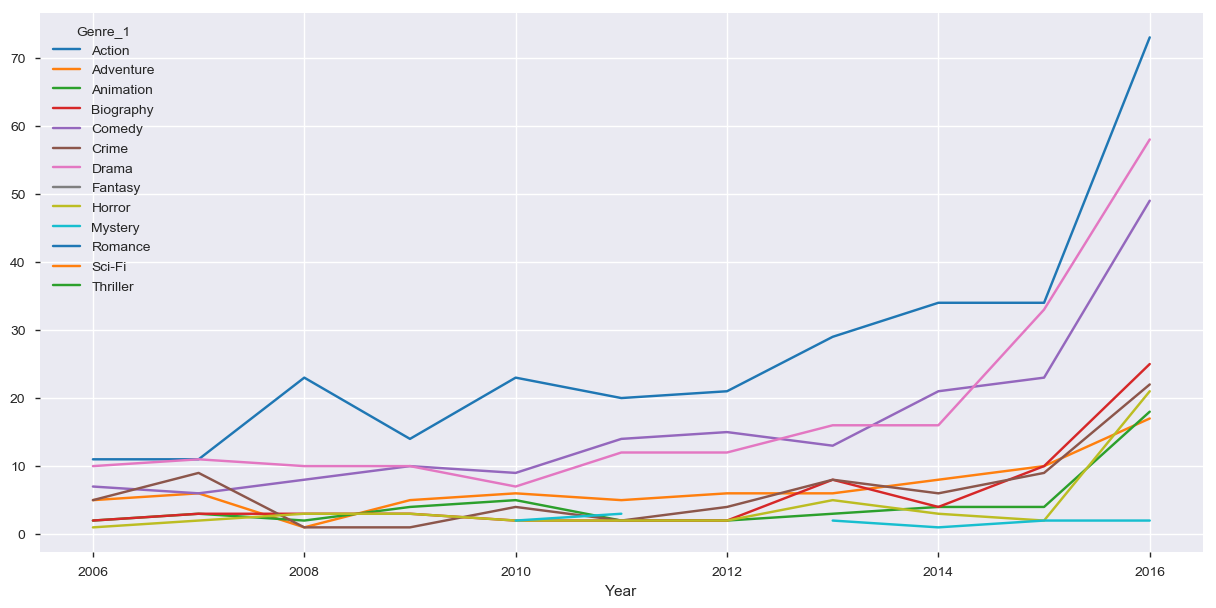

In [31]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
movies_df.groupby(['Year','Genre_1']).count()['Rating'].unstack().plot(ax=ax)

__From the data of last 10 years, it can be observed that more action movies are releases each year followed by Drama, comedy while Mystery, Horror genre are having least number of movies released__

ValueError: `dataset` input should have multiple elements.

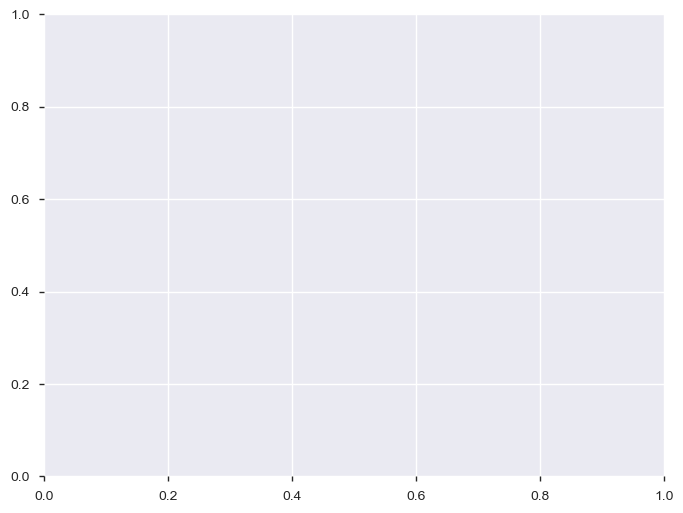

In [33]:
movies_Director=movies_df.groupby('Director')
#movies_Director=movies_Director[movies_Director['Rank'] > 4]
movies_Director.count().sort_values('Rank',ascending=False).head(20)
#.sort_values(by='Rank', ascending=False)
fig, ax = plt.subplots(figsize=(8,6))
bp =movies_Director.plot(kind='kde', ax=ax)

In [ ]:
movies_genre1= movies_df.groupby(['Year', 'Genre_1'])
movies_genre1.head(1)

In [ ]:
movies_top10_Revenues=movies_df[movies_df['Revenue (Millions)'].notnull()].sort_values('Revenue (Millions)',ascending=False)
#movies_top10_Revenues.head(5)
movies_top10_Revenues.loc[:,['Year','Revenue (Millions)']].head(5)

In [ ]:
movies_top10_Revenues[movies_top10_Revenues['Revenue (Millions)']>400].sort_values('Revenue (Millions)',ascending=False).plot.bar()

In [ ]:
sns.jointplot(data=movies_df, y='Revenue (Millions)', x='Metascore')

In [ ]:
Movies_Director=movies_df.groupby('Director')
Movies_Director.count().sample()

In [ ]:
#movies_yd = movies_df.groupby(['Year','Director'])

movies_df.describe()

In [ ]:
import numpy as np
movies_df.isnull().sum()
#movies_df.fillna(" ",inplace=True)

In [ ]:
movies_df[movies_df['Revenue (Millions)']==0].count()

In [ ]:
movies_df.isnull().sum()

In [ ]:
movies_df_2005_2010 = movies_df.loc[(movies_df.Year>=2005) & (movies_df.Year<=2010)]
movies_df_2005_2010

In [ ]:
#movies_yearwise[movies_yearwise['Revenue (Millions)']].sum() 
#movies_df['Revenue (Millions)']=movies_df['Revenue (Millions)'].replace(np.nan,0,inplace=True)
#movies_df['Revenue (Millions)']=movies_df['Revenue (Millions)'].astype('float')
movies_df

In [ ]:
movies_top10_Votes=movies_df[movies_df['Votes'].notnull()].sort_values('Votes',ascending=False)
#movies_top10_Votes.head(5)
movies_top10_Votes= movies_top10_Votes.loc[:,['Year','Votes','Revenue (Millions)']].head(10)
movies_top10_Votes.head(5)

In [ ]:
movies_top10_Ratings=movies_df[movies_df['Rating'].notnull()].sort_values('Rating',ascending=False)
movies_top10_Ratings.head(3)
#Genre = ['Action','Drama','Crime','Comedy']
Genre = ['Comedy','Drama','Music']
#Genre1 = ['Action','Adventure','Sci-Fi']
#movies_top10_Ratings[movies_top10_Ratings.Genre.isin(Genre)].count()
#subset = movies_top10_Ratings[movies_top10_Ratings['Actors'].str.contains('Will Smith')]
subset = movies_top10_Ratings[movies_top10_Ratings['Genre'].str.contains('Comedy')]
subset
#Actors=['Will Smith','Vin Diesel']
#movies_top10_Ratings[movies_top10_Ratings.Actors.isin(Actors)].count()
#movies_top10_Ratings[movies_top10_Ratings['Actors']].unique()


In [ ]:
fig, axes = plt.subplots(2, 3)
fig.set_size_inches(12, 8)

m1 = sns.distplot(movies_df['Rating'], bins=15, ax=axes[0, 0])
m2 = sns.distplot(movies_df['Metascore'], bins=15, ax=axes[0, 1])
m3 = sns.distplot(movies_df['Runtime (Minutes)'], bins=15, ax=axes[0, 2])
m4 = sns.distplot(movies_df['Revenue (Millions)'], bins=15, ax=axes[1, 0])
m5 = sns.distplot(movies_df['Votes'], bins=15, ax=axes[1, 1])
m6 = sns.distplot(movies_df['Year'], bins=15, ax=axes[1, 2])

#plt.setp(axes, yticks=[])
plt.tight_layout()


In [ ]:
movies_df['UpdatedRating'] = movies_df['Rating']
movies_df['UpdatedRating'] = movies_df['Rating'].apply(lambda s: np.ceil(s))
movies_df.sample(10)

In [ ]:
movies_RatingWise = movies_df.groupby(['UpdatedRating'])
movies_RatingWise.count()

In [ ]:
movies_RatingWise['UpdatedRating'].value_counts().plot.bar()

In [ ]:
From the above readings it can be concluded that almost 80% movies received good ratings > 7. 

In [ ]:
def counting_values(df, column):
    value_count = {}
    for row in df[column].dropna():
        if len(row) > 0:
            for key in row:
                if key in value_count:
                    value_count[key] += 1
                else:
                    value_count[key] = 1
        else:
            pass
return value_count

In [ ]:
genres_count = pd.Series(counting_values(movies_df, 'Genre'))
genres_count
#genres_count.sort_values(ascending = False).head(10).plot(kind = 'bar')

In [ ]:
movies_Genre =  movies_df.copy()
movies_Genre.info()

In [ ]:
def explode(df, lst_cols, fill_value='', preserve_index=False):
    # make sure `lst_cols` is list-alike
    if (lst_cols is not None
        and len(lst_cols) > 0
        and not isinstance(lst_cols, (list, tuple, np.ndarray, pd.Series))):
        lst_cols = [lst_cols]
    # all columns except `lst_cols`
    idx_cols = df.columns.difference(lst_cols)
    # calculate lengths of lists
    lens = df[lst_cols[0]].str.len()
    # preserve original index values    
    idx = np.repeat(df.index.values, lens)
    # create "exploded" DF
    res = (pd.DataFrame({
                col:np.repeat(df[col].values, lens)
                for col in idx_cols},
                index=idx)
             .assign(**{col:np.concatenate(df.loc[lens>0, col].values)
                            for col in lst_cols}))
    # append those rows that have empty lists
    if (lens == 0).any():
        # at least one list in cells is empty
        res = (res.append(df.loc[lens==0, idx_cols], sort=False)
                  .fillna(fill_value))
    # revert the original index order
    res = res.sort_index()
    # reset index if requested
    if not preserve_index:        
        res = res.reset_index(drop=True)
    return res

In [ ]:
movies_Genre.genres = movies_Genre.Genre.str.split(',')
movies_Genre = explode(movies_Genre, ['Genre'])
movies_Genre.head()